In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import pickle
%matplotlib inline

In [30]:
train_images = pickle.load(open("training_images.pickle","rb"))
train_labels = pickle.load(open("training_labels.pickle","rb"))

test_images = pickle.load(open("test_images.pickle","rb"))
test_labels = pickle.load(open("test_labels.pickle","rb"))

In [31]:
IMAGE_SIZE = 100
CATEGORIES = ["elliptical","spiral"]

elliptical


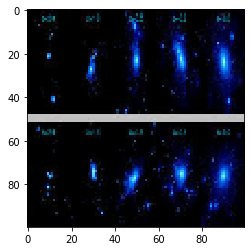

In [32]:
plt.imshow(train_images[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[train_labels[0]])

spiral


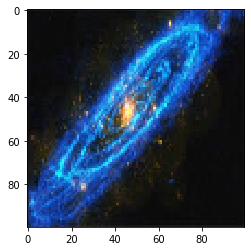

In [33]:
plt.imshow(test_images[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[test_labels[0]])

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),   
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128,activation=tf.nn.relu),                
    keras.layers.Dense(64,activation=tf.nn.relu),                
    keras.layers.Dense(len(CATEGORIES))
])

model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 64)       

In [36]:
tf.config.optimizer.set_jit(True)

In [37]:
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=6,batch_size=32)

Train on 1159 samples, validate on 386 samples
Epoch 1/6
1159/1159 [==============================] - 11s 9ms/sample - loss: 0.6671 - accuracy: 0.5988 - val_loss: 0.6874 - val_accuracy: 0.4948
Epoch 2/6
1159/1159 [==============================] - 10s 9ms/sample - loss: 0.6221 - accuracy: 0.6333 - val_loss: 0.5190 - val_accuracy: 0.7617
Epoch 3/6
1159/1159 [==============================] - 11s 9ms/sample - loss: 0.5985 - accuracy: 0.6790 - val_loss: 0.6046 - val_accuracy: 0.6839
Epoch 4/6
1159/1159 [==============================] - 11s 9ms/sample - loss: 0.5741 - accuracy: 0.7023 - val_loss: 0.5050 - val_accuracy: 0.7772
Epoch 5/6
1159/1159 [==============================] - 10s 9ms/sample - loss: 0.5026 - accuracy: 0.7636 - val_loss: 0.4702 - val_accuracy: 0.7798
Epoch 6/6
1159/1159 [==============================] - 11s 9ms/sample - loss: 0.4866 - accuracy: 0.7524 - val_loss: 0.4697 - val_accuracy: 0.8057


In [38]:
model.evaluate(test_images,test_labels)

386/386 [==============================] - 1s 2ms/sample - loss: 0.4697 - accuracy: 0.8057


[0.46973151609378777, 0.80569947]

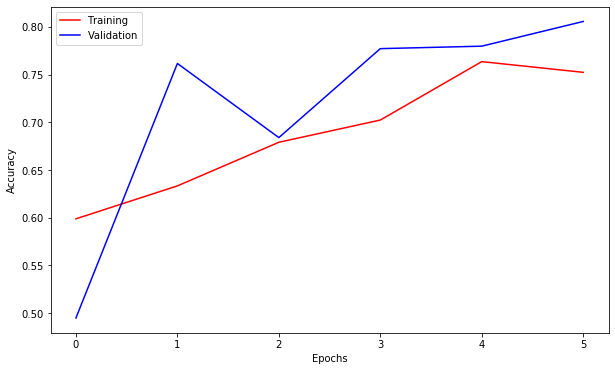

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

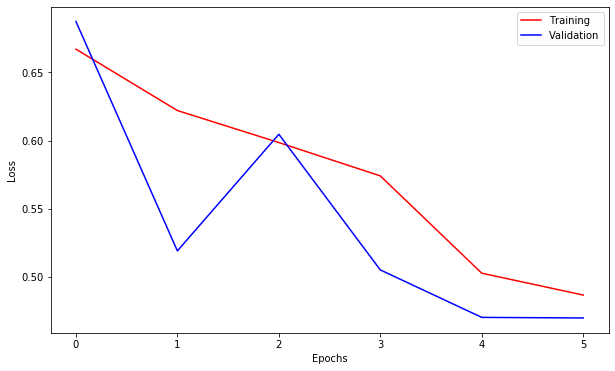

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [41]:
model.save("CNN-Classifier.h5")